Step 1 - Import python libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns
import scipy
import pandas.util.testing as tm
from scipy import stats

Step 2 - Load and read the data file

1.   Upload data file from Google drive and run the notebook in the cloud
2.   Upload data file from local computer and run the notebook in the cloud
3.   Load data file from local computer and run the notebook locally

Step 2 - Option 1 - Upload data file from Google drive

In [6]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
#change the file name ("complete_COVID_samples.tsv") to your file name to load the data
df=pd.read_table('/content/drive/MyDrive/complete_COVID_samples.tsv')
df

distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker


KilledWorker: ignored

Step 2 - Option 2 - Upload data file from local computer

In [ ]:
#from google.colab import files 
uploaded = files.upload()

In [ ]:
import io

#change the file name ("complete_COVID_samples.tsv") to your file name to load the data
df = pd.read_table(io.BytesIO(uploaded['complete_COVID_samples.tsv']), sep = '\t')
df

Step 2 - Option 3 - Run the notebook locally (refer here for how to connect to local runtime https://research.google.com/colaboratory/local-runtimes.html)

In [ ]:
#change the file name ("complete_COVID_samples.tsv") to your file name to load the data
df = pd.read_table('downloads/covid_data/complete_COVID_samples.tsv', sep = '\t')
df

Step 3 - Create the standardized format (column content and column names)
1.   Sample name (sample)
2.   Clone frequency (freq)
3.   Clone reads count (#count)
4.   CDR3 amino acid clonotype (cdr3aa)
5.   CDR3 nucleotide (cdr3nt)
6.   V gene (v)
7.   D gene (d)
8.   J gene (j)
9.   Optional - Sample feature (here we use hospitalization as the clinical feature)

In [ ]:
#select the columns that are listed above
df = df[['sample','frequency', 'templates', 'amino_acid', 'rearrangement', 'v_resolved', 'd_resolved','j_resolved','hospitalized']]
#rename the columns 
df.columns = ['sample', 'freq' , '#count' , 'cdr3aa' , 'cdr3nt' , 'v' , 'd' , 'j' , 'hospitalization']
df

,sample,freq,#count,cdr3aa,cdr3nt,v,d,j,hospitalization
0,6232BW_TCRB,0.006751,3636,CASSLGLAGPGFF,ACGATCCAGCGCACAGAGCAGGAGGACTCGGCCGTGTATCTCTGTG...,TCRBV07-02,TCRBD02-01*02,TCRBJ02-01*01,True
1,6232BW_TCRB,0.005639,3037,CASRVGSSYNEQFF,ATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCA...,TCRBV12,TCRBD02-01*02,TCRBJ02-01*01,True
2,6232BW_TCRB,0.004258,2293,CASNPYRVNTGELFF,GAGTCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCA...,TCRBV27-01*01,TCRBD02-01*02,TCRBJ02-02*01,True
3,6232BW_TCRB,0.003639,1960,CASSALRSSYNEQFF,CAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCAGCT...,TCRBV12,unknown,TCRBJ02-01*01,True
4,6232BW_TCRB,0.003521,1896,CASSFEDEGGETQYF,AACGCCTTGTTGCTGGGGGACTCGGCCCTCTATCTCTGTGCCAGCA...,TCRBV05-06*01,unknown,TCRBJ02-05*01,True
...,...,...,...,...,...,...,...,...,...
15061643,1566265BW_TCRB,0.000001,1,CSVEDLRGGYTF,CTGACTGTGAGCAACATGAGCCCTGAAGACAGCAGCATATATCTCT...,TCRBV29-01,unknown,TCRBJ01-02*01,False
15061644,1566265BW_TCRB,0.000001,1,CASGRRGDYGYTF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,unknown,TCRBJ01-02*01,False
15061645,1566265BW_TCRB,0.000001,1,CASSWTGNSPLHF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,TCRBD02-01,TCRBJ01-06*02,False
15061646,1566265BW_TCRB,0.000001,1,CASSLDWTEYYEQYF,CAGCCTGCAAAGCTTGAGGACTCGGCCGTGTATCTCTGTGCCAGCA...,TCRBV11-02*01,TCRBD01-01*01,TCRBJ02-07*01,False


In [ ]:
#create a dataframe with reads count for each sample
df_reads = df.groupby(['sample','hospitalization']).agg({'#count':'sum'}).reset_index().rename(columns={'#count':"count"})

#create a dataframe with clonotype count for each sample
df_diversity = df.groupby(['sample','hospitalization'], sort=False).size().reset_index(name='clonotype_count')

In [ ]:
#add clonotype count of each sample as a column to create a new dataframe
df=pd.merge(df, df_diversity, on=['sample','hospitalization'])
df

,sample,freq,#count,cdr3aa,cdr3nt,v,d,j,hospitalization,clonotype_count
0,6232BW_TCRB,0.006751,3636,CASSLGLAGPGFF,ACGATCCAGCGCACAGAGCAGGAGGACTCGGCCGTGTATCTCTGTG...,TCRBV07-02,TCRBD02-01*02,TCRBJ02-01*01,True,218977
1,6232BW_TCRB,0.005639,3037,CASRVGSSYNEQFF,ATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCA...,TCRBV12,TCRBD02-01*02,TCRBJ02-01*01,True,218977
2,6232BW_TCRB,0.004258,2293,CASNPYRVNTGELFF,GAGTCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCA...,TCRBV27-01*01,TCRBD02-01*02,TCRBJ02-02*01,True,218977
3,6232BW_TCRB,0.003639,1960,CASSALRSSYNEQFF,CAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCAGCT...,TCRBV12,unknown,TCRBJ02-01*01,True,218977
4,6232BW_TCRB,0.003521,1896,CASSFEDEGGETQYF,AACGCCTTGTTGCTGGGGGACTCGGCCCTCTATCTCTGTGCCAGCA...,TCRBV05-06*01,unknown,TCRBJ02-05*01,True,218977
...,...,...,...,...,...,...,...,...,...,...
15061643,1566265BW_TCRB,0.000001,1,CSVEDLRGGYTF,CTGACTGTGAGCAACATGAGCCCTGAAGACAGCAGCATATATCTCT...,TCRBV29-01,unknown,TCRBJ01-02*01,False,453526
15061644,1566265BW_TCRB,0.000001,1,CASGRRGDYGYTF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,unknown,TCRBJ01-02*01,False,453526
15061645,1566265BW_TCRB,0.000001,1,CASSWTGNSPLHF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,TCRBD02-01,TCRBJ01-06*02,False,453526
15061646,1566265BW_TCRB,0.000001,1,CASSLDWTEYYEQYF,CAGCCTGCAAAGCTTGAGGACTCGGCCGTGTATCTCTGTGCCAGCA...,TCRBV11-02*01,TCRBD01-01*01,TCRBJ02-07*01,False,453526


Diversity analysis 1 - Shannon-Wiener index [shannon_wiener_index]

In [ ]:
#calculation step 1
df['shannon_index'] = -(df['freq']*np.log(df['freq']))

#calculation step 2
df_shannon= df.groupby(['sample','hospitalization']).agg({'shannon_index':'sum'}).reset_index().rename(columns={'':"shannon_index"})

#calculation step 3, Shannon-Wienex index is shown in the shannon_wiener_index column
df_shannon['shannon_wiener_index'] = np.exp(df_shannon['shannon_index'])
df_shannon_index = df_shannon[['sample', 'hospitalization','shannon_wiener_index']]

Diversity analysis 2 - Normalized Shannon-Wiener index [normalized_shannon_wiener_index]

In [ ]:
#calculation step 1 - merge df_shannon and df_diversity (which contains clonotype counts)
df_shannon=pd.merge(df_shannon, df_diversity, on=['sample','hospitalization'])

#calculation step 2 - calculate normalized Shannon-Wienex index, it is shown in the normalized_shannon_wiener_index column
df_shannon['normalized_shannon_wiener_index'] = df_shannon['shannon_index']/np.log(df_shannon['clonotype_count'])
df_norm_shannon = df_shannon[['sample', 'hospitalization','shannon_wiener_index','normalized_shannon_wiener_index']]

Diversity analysis 3 - Inverse Simpson index [inverse_simpson_index]

In [ ]:
#calculation step 1
df['simpson_index'] = (df['freq']**2)

#calculation step 2
df_simpson= df.groupby(['sample','hospitalization']).agg({'simpson_index':'sum'}).reset_index().rename(columns={'':"simpson_index"})

#calculation step 3, Inverse Simpson index is shown in the inverse_simpson_index column
df_simpson['inverse_simpson_index'] = 1/df_simpson['simpson_index']

Diversity analysis 4 - Gini Simpson index [gini_simpson_index]


In [ ]:
df_simpson['gini_simpson_index'] = 1-df_simpson['simpson_index']

Diversity analysis 5 - D50 index [D50_index]


In [ ]:
#create an empty dataframe for storing results
df_D50 = pd.DataFrame()

#create a list of the sample names
samples = set(df['sample'])

for sample in samples:

  #store the rows related to the sample
  df_temp = df.loc[df['sample'] == sample]

  #sort the sample clonotypes by frequency in descending order
  df_temp = df_temp.sort_values(by='freq', ascending=False)

  #create a column to store the order
  df_temp['clonotype_number'] = np.arange(df_temp.shape[0])+1

  #compute and store the cumulative sum of the frequencies
  df_temp['accum_freq'] = df_temp['freq'].cumsum()

  #find out the first accumulated frequency that is above 50%
  df_temp = df_temp.loc[(df_temp['accum_freq']>=0.5) & (df_temp['accum_freq']<=0.6)]
  df_temp=df_temp.head(1)

  #calculate D50 index and store in the result dataframe
  df_temp = df_temp.head(1)
  df_temp['D50_index'] = df_temp['clonotype_number']/df_temp['clonotype_count']*100
  df_D50 = pd.concat([df_D50, df_temp])

#D50 index 
df_D50 = df_D50[['sample', 'hospitalization', 'D50_index']]

Diversity analysis 6 - Chao1 estimate [chao1] and standard deviation [chao1_SD]







In [ ]:
#create an empty dataframe for storing results
df_chao1 = pd.DataFrame()

#create a list of the sample names
samples = set(df['sample'])

for sample in samples:

  #store the rows related to the sample
  df_temp = df.loc[df['sample'] == sample]
  
  df_temp = df_temp.copy()
  
  #count singleton in the sample
  df_temp['singleton'] = (df_temp.loc[df_temp['#count'] == 1]).sum()

  #count doubleton in the sample
  df_temp['doubleton'] = (df_temp.loc[df_temp['#count'] == 2]).sum()

  #calculate Chao1 estimate 
  df_temp['chao1'] = df_temp['clonotype_count'] + ((df_temp['singleton'] * (df_temp['singleton']-1))/(2 * (df_temp['doubleton']+1)))
 
  #calculate Chao1 estimate standard deviation
  step1 = 1/4*((df_temp['singleton']/df_temp['doubleton'])**4)
  step2 = (df_temp['singleton']/df_temp['doubleton'])**3
  step3 = 1/2*((df_temp['singleton']/df_temp['doubleton'])**2)
  step4 = df_temp['doubleton'] * (step1+step2+step3)
  df_temp['chao1_SD'] = step4**(1/2)

  #store the results in the result dataframe
  df_chao1 = pd.concat([df_chao1, df_temp])

  #remove the duplicates results in the result dataframe
  df_chao1 = df_chao1[['sample','hospitalization', 'chao1', 'chao1_SD']]
  df_chao1 = df_chao1.drop_duplicates(subset=['sample'], keep='first')

#Chao1 estimate is shown in the chao1 column, standard deviation is shown in the chao1_SD column
df_chao1

Diversity analysis 7 - Gini coefficient [gini_coefficient]

In [ ]:
#create an empty dataframe for storing results
df_gini = pd.DataFrame()

#create a list of the sample names
samples = set(df['sample'])

for sample in samples:

  #store the rows related to the sample
  df_temp = df.loc[df['sample'] == sample]

  def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    return (fair_area - area) / fair_area
  
  #calculate gini coefficient
  df_temp['gini_coefficient']=gini(df_temp['freq'])

  #store the results in the result dataframe
  df_gini = pd.concat([df_gini, df_temp])

  #remove the duplicates results in the result dataframe
  df_gini = df_gini[['sample', 'hospitalization', 'gini_coefficient']]
  df_gini = df_gini.drop_duplicates(subset=['sample'], keep='first')

#Gini coefficient is shown in the gini_coefficient column
df_gini

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,sample,hospitalization,gini_coefficient
6462741,964229BW_TCRB,N,0.520002
11093982,3943BW_TCRB,N,0.522932
14608122,1566265BW_TCRB,N,0.391194
8239376,1566486BW_TCRB,N,0.237706
1308776,2987BW_TCRB,Y,0.405014
6183299,1566426BW_TCRB,N,0.244315
218977,5115BW_TCRB,Y,0.659933
11300982,1337122BW_TCRB,N,0.329197
2198252,234129BW_TCRB,N,0.374515
766842,7972BW_TCRB,Y,0.309286


Diversity analysis 8.1 - Summary table for the diversity analysis

In [ ]:
#create a dataframe that combines all the diversity analysis 
dfs = [df_norm_shannon, df_simpson, df_D50, df_chao1, df_gini]

df_combined = pd.merge(dfs[0], dfs[1], left_on=['sample','hospitalization'], right_on=['sample','hospitalization'], how='outer')
for d in dfs[2:]:
    df_combined = pd.merge(df_combined, d, left_on=['sample','hospitalization'], right_on=['sample','hospitalization'], how='outer')

df_combined

Diversity analysis 8.2 - Statistical analysis of diversity metrics

Diversity analysis 8.2.1 - Test if the certain diversity metric is normally distributed 
1.   the null hypothesis here is normality 
2.   if the p value is greater than 0.05, we cannot reject the null hypothesis (it is a normal distribution). If the p value is smaller than 0.05, we reject the null hypothesis (it is not a normal distribution)
3.   change the "shannon_wiener_index" to other metrics that you are interested in

In [ ]:
x = stats.normaltest(df_combined['shannon_wiener_index'])
x

NormaltestResult(statistic=10.511829542379445, pvalue=0.005216572138781039)

Diversity 8.2.2 - Mean or median of diversity metrics among groups 
1.   if the dataset is normally distributed, calculate mean
2.   if the dataset is not normally distributed, calculate median

In [ ]:
#calculate the mean among two groups
df_combined_mean = pd.DataFrame(columns=['hospitalization'])
for column in df_combined[['shannon_wiener_index','normalized_shannon_wiener_index','inverse_simpson_index','gini_simpson_index','D50_index','chao1','gini_coefficient']]:
  df_temp = df_combined.groupby('hospitalization')[column].mean().reset_index()
  df_combined_mean = pd.merge(df_combined_mean, df_temp, on=['hospitalization'], how='right')
df_combined_mean

,hospitalization,shannon_wiener_index,normalized_shannon_wiener_index,inverse_simpson_index,gini_simpson_index,D50_index,chao1,gini_coefficient
0,N,16668.025925,0.746453,8491.613572,0.998619,33.823858,1.759847e+06,0.384998
1,Y,12144.735913,0.726158,2513.737872,0.994756,32.151082,1.443634e+06,0.401635


In [ ]:
#calculate the median among two groups
df_combined_median = pd.DataFrame(columns=['hospitalization'])
for column in df_combined[['shannon_wiener_index','normalized_shannon_wiener_index','inverse_simpson_index','gini_simpson_index','D50_index','chao1','gini_coefficient']]:
  df_temp = df_combined.groupby('hospitalization')[column].median().reset_index()
  df_combined_median = pd.merge(df_combined_median, df_temp, on=['hospitalization'], how='right')
df_combined_median

,hospitalization,shannon_wiener_index,normalized_shannon_wiener_index,inverse_simpson_index,gini_simpson_index,D50_index,chao1,gini_coefficient
0,N,16818.878142,0.764617,4103.153484,0.999755,37.003488,1.669349e+06,0.363580
1,Y,10671.856917,0.752044,1417.315876,0.999294,39.511525,1.539989e+06,0.352659


Diversity analysis 8.2.3 - Stat test
1.  if the dataset is normally distributed, use t-test (stats.ttest_ind)

*   change the group1, group2 to the groups/samples that you are interested in
*   change the "shannon_wiener_index" to other metrics that you are interested in

2.  if the dataset is not normally distributed, use Wilcoxon rank-sum test (stats.ranksums)
*   change the group1, group2 to the groups/samples that you are interested in
*   change the "shannon_wiener_index" to other metrics that you are interested in

In [ ]:
df1 = df_combined.copy()
df_group1 = df1[df1['hospitalization'] == 'Y']
df_group2 = df1[df1['hospitalization'] == 'N']
stats.ranksums(df_group1['shannon_wiener_index'], df_group2['shannon_wiener_index'])

RanksumsResult(statistic=-1.0159443179342347, pvalue=0.30965590304585666)

Plot box plot or violin plot based on the diversity index that you are interested in
1.   change x = 'hospitalization' to the feature that you are interested
2.   change y = 'normalized_shannon_wiener_index' to the index that you desire
3.   set x label to the feature that you choose
4.   set y label to the index that you choose

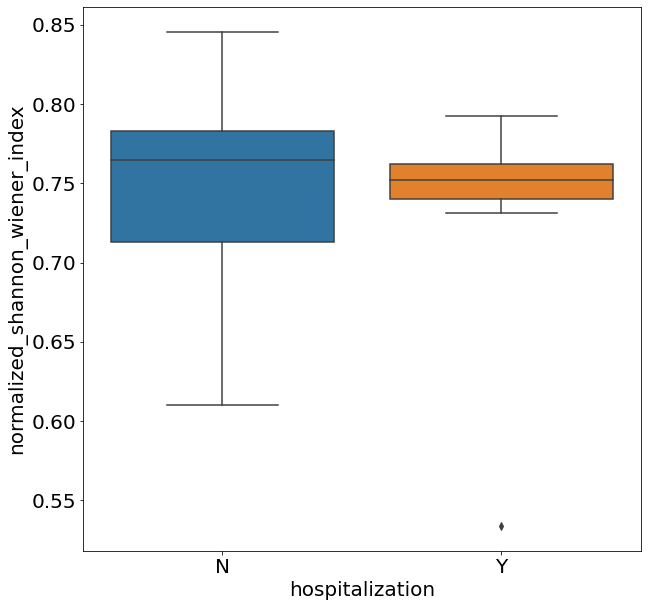

In [ ]:
ax = plt.subplots(figsize = (10,10))

ax = sns.boxplot(x='hospitalization',y='normalized_shannon_wiener_index', data=df_combined)

ax.set_xlabel('hospitalization',fontsize=20)
ax.set_ylabel('normalized_shannon_wiener_index',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()